# Elecciones




#### <p> vamos a bajar data de https://infogob.jne.gob.pe/Eleccion <br>
<p> Esta pagina tiene excels de todas las elecciones regionales y municipales<br>
<p> A su vez contiene no solo el resultado, sino tmbn quienes postularon y la cantidad de votos

In [151]:
# se importan los paquetes necesarios para la generación de datos
# instalar todos los paquete necesario o crear un enviroment para agilizar el proceso
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait,Select
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import zipfile
import shutil
import os
import time
import glob


In [152]:
#INICIALIZANDO EL DRIVER CON LA PAGINA WEB
# https://infogob.jne.gob.pe/Eleccion

driver = webdriver.Chrome()
driver.maximize_window()# sin ninguna acción maximiza
url = 'https://infogob.jne.gob.pe/BaseDatos'
driver.get(url)



# ELECCIONES REGIONALES

Se realizaron 4 desde 2007: 2010, 2014 , 2018 y bueno considerando 2006

In [153]:
# DETERMINAMOS CUAL ES LA CATEGORIA EN LA QUE VAMOS A SCRAPEAR
# ESTA SERÁ LA REGIONAL
ingreso = WebDriverWait(driver, 20).until(
    
    EC.element_to_be_clickable((By.XPATH, '//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[1]/div'))
)

ingreso.click()

time.sleep(2)

ingreso_reg = WebDriverWait(driver, 20).until(

    EC.element_to_be_clickable((By.XPATH, '//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[1]/div/div[2]/div[5]'))
)

ingreso_reg.click()

time.sleep(2)

# HASTA ACA YA ESTA SELECCIONADA LA CATEGORIA DE ELECCIONES REGIONALES

In [154]:
# AHORA VA CUAL DE LAS ELECCIONES DESEAS

ingreso_año = WebDriverWait(driver, 20).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[2]/div'))
)

ingreso_año.click()

time.sleep(2)

# HTML DE LOS PROCESOS ELECTORALES

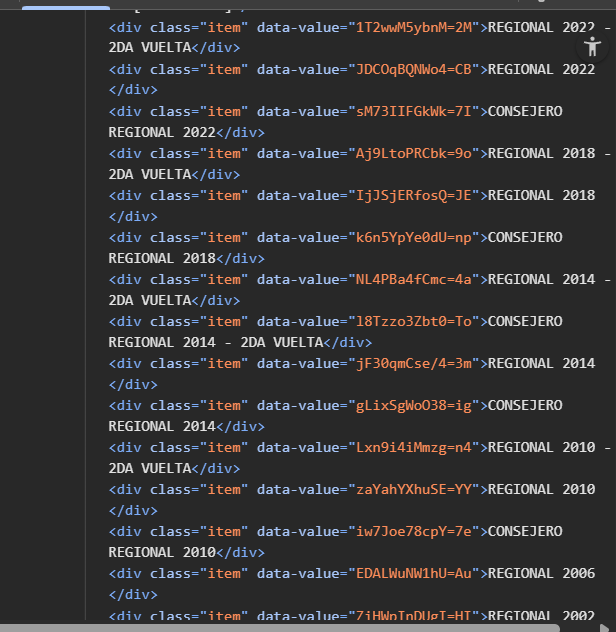

### LISTADO DE PROCESOS ELECTORALES A SCRAPEAR

REGIONAL_2006:<br>

xpath:'//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[2]/div/div[2]/div[15]'<br>

REGIONAL_2010<br>

xpath:'//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[2]/div/div[2]/div[13]'<br>

REGIONAL_2014<br>

xpath:'//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[2]/div/div[2]/div[10]'<br>

REGIONAL_2018<br>

xpath:'//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[2]/div/div[2]/div[6]'<br>

REGIONAL_2022<br>

xpath:'//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[2]/div/div[2]/div[3]'<br>

#### *TENER CUIDADO CON LOS XPATH, SE DEBE DE ACTUALIZAR PERIODICAMENTE

In [155]:
# Ejemplo de descarga para el año 2066

ingreso_año_1 = WebDriverWait(driver, 20).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[2]/div/div[2]/div[15]'))
)

driver.execute_script("arguments[0].scrollIntoView(true);", ingreso_año_1) # que pasa? sucede que este elemento esta oculto entonces le doy un scroll interno al menu desplegable de la caja

ingreso_año_1.click()

time.sleep(2)

In [156]:
# Damos click en el botón de obtener datos

des_dt= WebDriverWait(driver, 20).until(
    EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/section/div[2]/div[2]/div[1]/div[3]/div[1]/div[2]/button'))
)


des_dt.click()


In [157]:
# AHORA VOY A ITERAR PARA LOS AÑOS QUE FALTAN 

pos=['13','10','6','3']

for elem in pos:
    ## PASO 1
    ingreso_año = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[2]/div'))
    )

    ingreso_año.click()

    time.sleep(2)

    ## PASO 2
    ingreso_año_1 = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, f'//*[@id="section"]/div[2]/div[2]/div[1]/div[2]/div/div[2]/div/div[2]/div[{elem}]'))
    )

    try:
    # Código que podría causar un error
        ingreso_año_1.click()
    except:
    # Código que se ejecuta si ocurre un Error

        driver.execute_script("arguments[0].scrollIntoView(true);", ingreso_año_1) # que pasa? sucede que este elemento esta oculto entonces le doy un scroll interno al menu desplegable de la caja

        ingreso_año_1.click()

    time.sleep(2)


    ## PASO 3
    des_dt= WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/section/div[2]/div[2]/div[1]/div[3]/div[1]/div[2]/button'))
    )


    des_dt.click()


# CONFIRMAS LA DESCARGA


time.sleep(2)


descarga_años = WebDriverWait(driver, 20).until(
    EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/section/div[2]/div[2]/div[2]/div/button'))
)


descarga_años.click()

time.sleep(2)
